In [31]:
# 使用するモデルのインポート
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
# その他のモジュールのインポート
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             confusion_matrix, ConfusionMatrixDisplay)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint, expon
import random

In [33]:
# ファイルの読み込み、データの格納・欠損値処理・確認
# file_path = "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/ビニング処理_卒研A.csv"
# file_path = "E:/実験/実験結果/卒研B/データセット/2. 不要特徴量削除/2.不要特徴量削除後 分類テスト.csv"
# file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット/2. 不要特徴量削除/2.不要特徴量削除後 分類テスト.csv"
file_path =  "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/vif_result.csv"
target_column = "SD_dis"
data = pd.read_csv(file_path)
data = data.drop(columns=["SD_con", "Minimum_duration_of_whole_fixations", "Duration_of_first_Visit", "First-pass_first_fixation_duration"])
data = data.fillna(data.mean())
data = data.loc[:403,:]
data.info()
X = data.drop(columns=[target_column])
y = data[target_column]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 54 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   SD_dis                                                   404 non-null    int64  
 1   Interest                                                 404 non-null    float64
 2   readers'_vocabulary                                      404 non-null    float64
 3   Average_duration_of_fixations                            404 non-null    float64
 4   Minimum_duration_of_fixations                            404 non-null    float64
 5   Maximum_duration_of_fixations                            404 non-null    float64
 6   Duration_of_first_fixation                               404 non-null    float64
 7   Average_pupil_diameter                                   404 non-null    float64
 8   Average_duration_of_Visit_per_

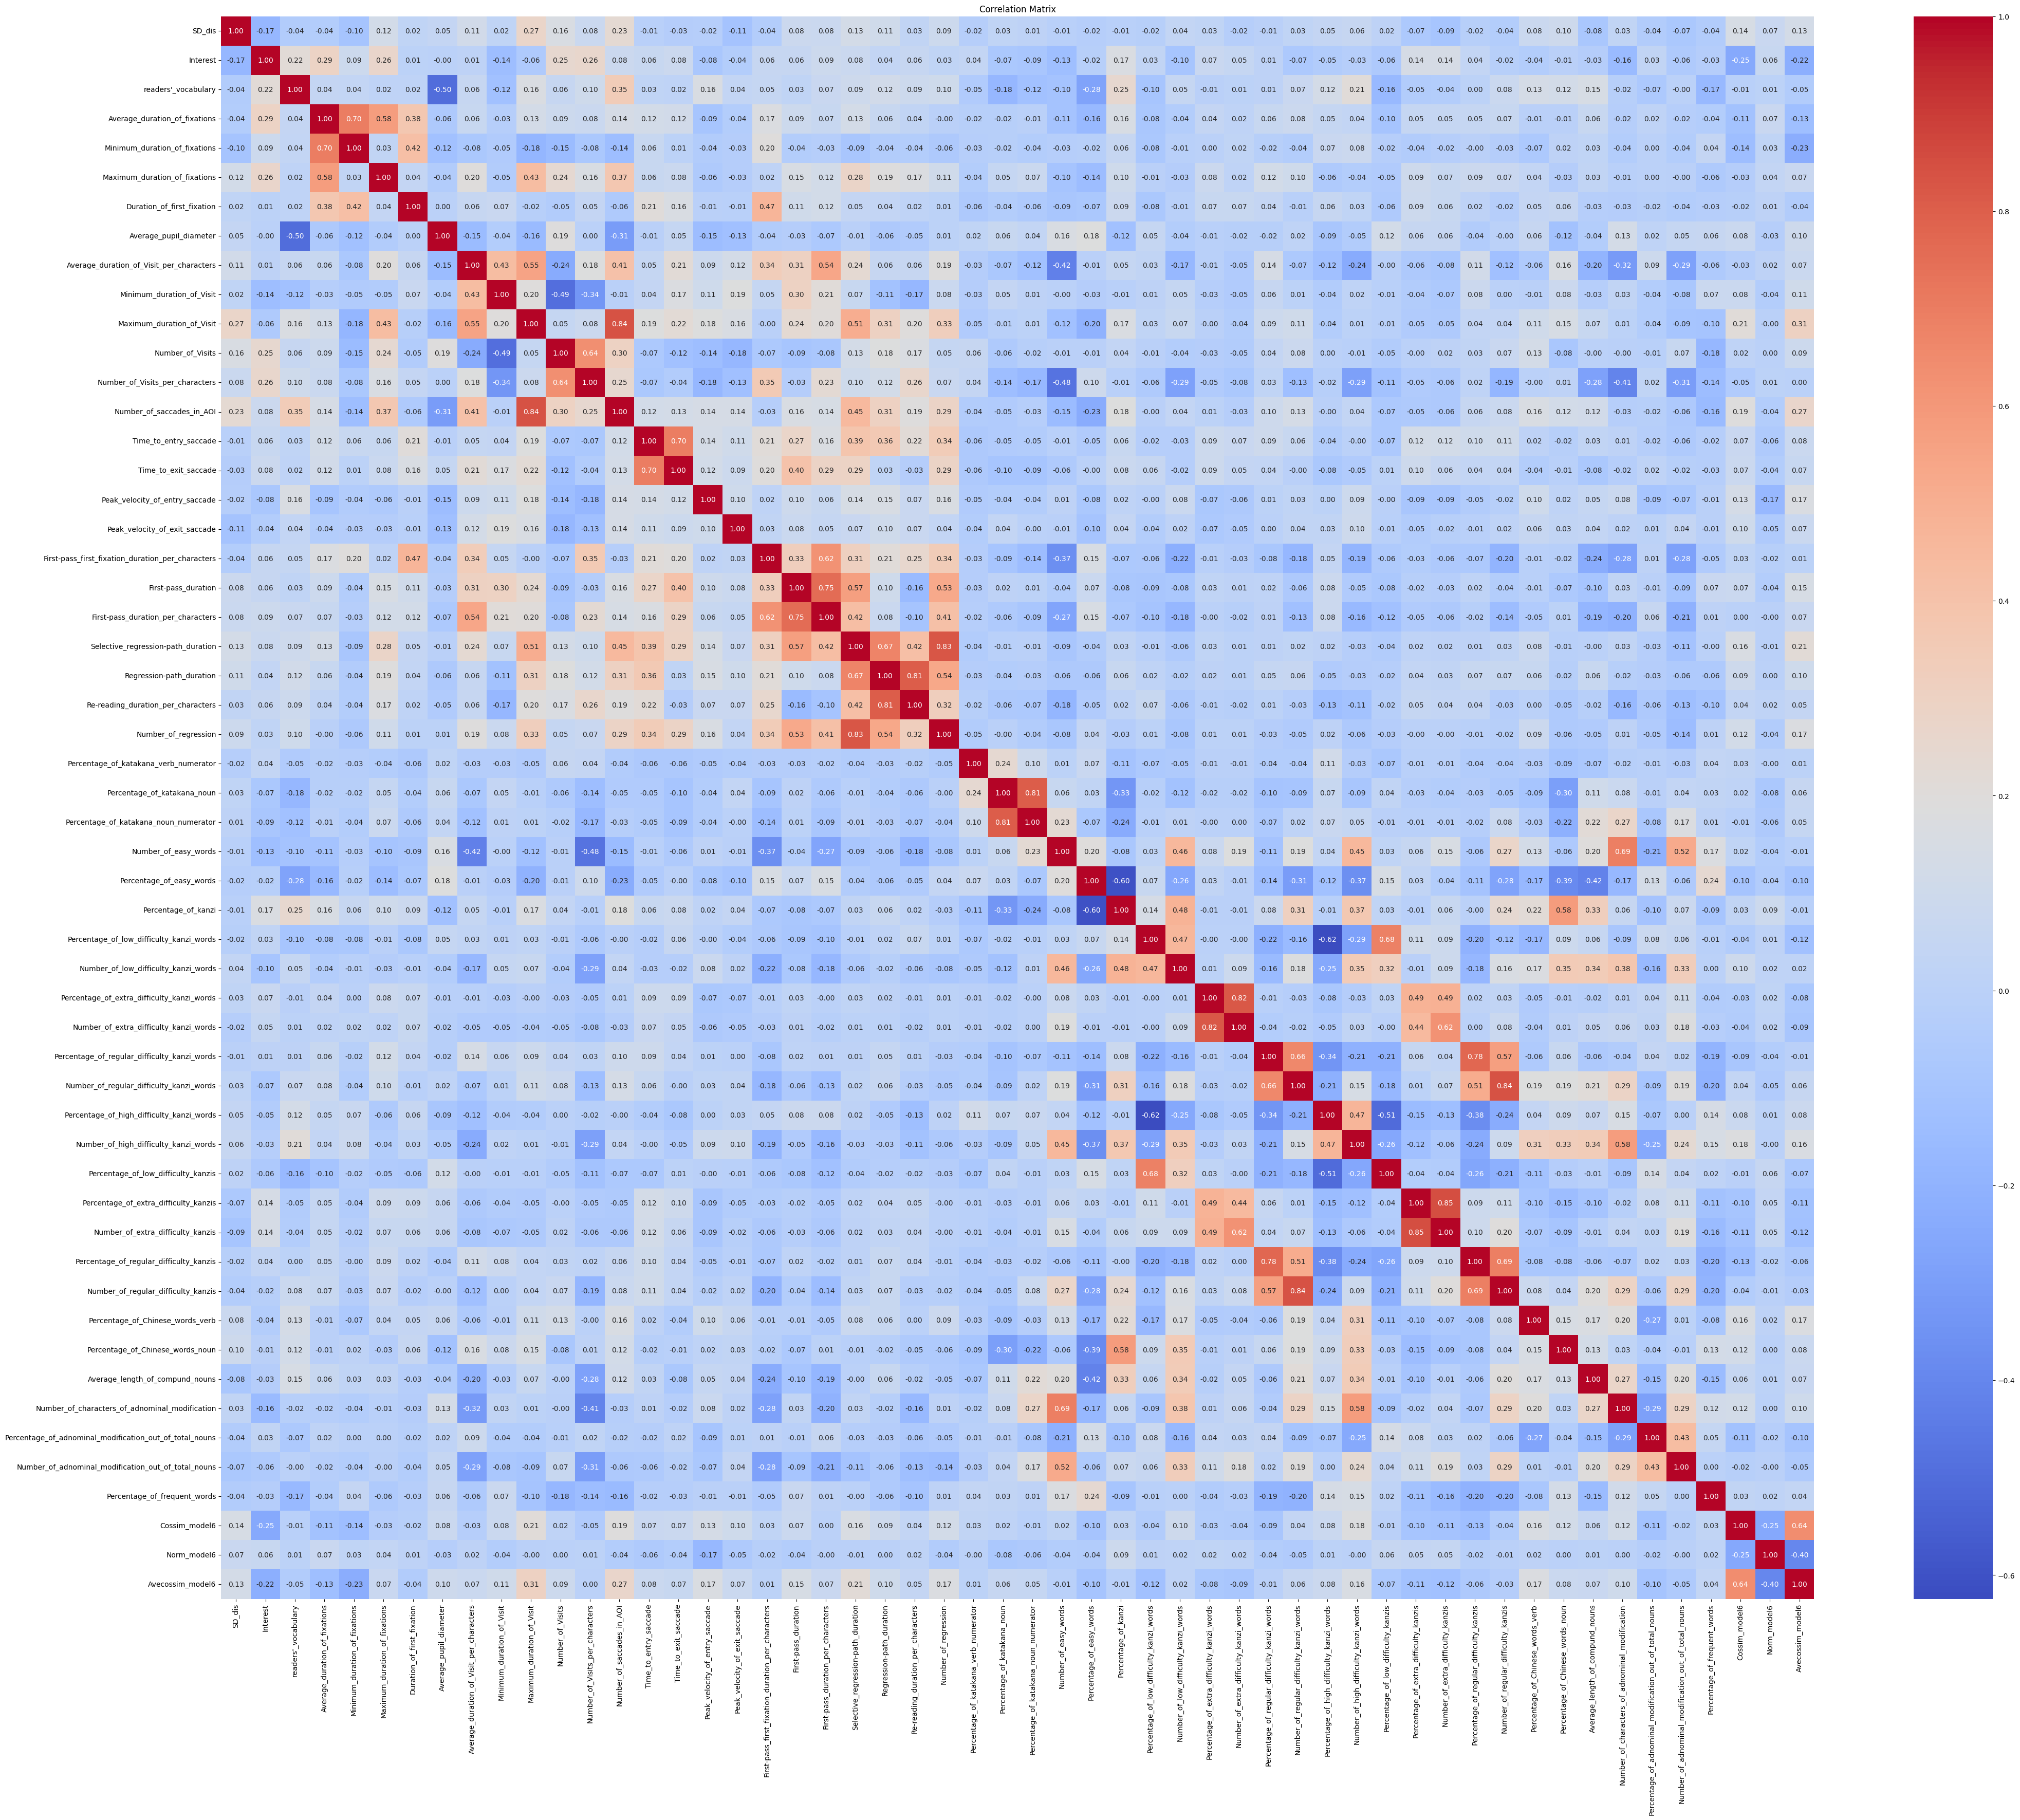

In [34]:
# データの可視化
plt.figure(figsize=(50, 40))
corr_matrix = data.corr('pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# # データの可視化
# plt.figure(figsize=(50, 40))
# corr_matrix = data.corr('spearman')
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Matrix")
# plt.show()

# # 散布図行列は時間かかるのでやりたいときだけ
# sns.pairplot(data)
# plt.title("Scatter Plot Matrix")
# plt.show()

In [35]:
# 特徴量選択
sfs = SFS(GradientBoostingClassifier(),
          k_features="best",
          forward = False,
          floating= True,
          scoring = 'accuracy',
          cv = 3,
          n_jobs= -1)

sfs = sfs.fit(X, y)

# 選択された特徴量の表示
selected_features = sfs.k_feature_names_
selected_features

('Number_of_Visits',
 'Number_of_Visits_per_characters',
 'Number_of_saccades_in_AOI',
 'Time_to_entry_saccade',
 'First-pass_first_fixation_duration_per_characters',
 'First-pass_duration',
 'Percentage_of_katakana_verb_numerator',
 'Percentage_of_katakana_noun',
 'Percentage_of_extra_difficulty_kanzis',
 'Number_of_characters_of_adnominal_modification',
 'Cossim_model6')

In [36]:
# specific_feature = ['Maximum_duration_of_Visit',
#  'Peak_velocity_of_entry_saccade',
#  'First-pass_first_fixation_duration_per_characters',
#  'Percentage_of_katakana_noun',
#  'Percentage_of_extra_difficulty_kanzi_words',
#  'Number_of_regular_difficulty_kanzi_words',
#  'Number_of_extra_difficulty_kanzis',
#  'Cossim_model6']

# sfs_model = "None"

# type(specific_feature)

In [37]:
# selected_features = X.columns
# selected_features = specific_feature

# 選択された特徴量のみをXに指定
X_slected = X[list(selected_features)]
X_slected.head()

,Number_of_Visits,Number_of_Visits_per_characters,Number_of_saccades_in_AOI,Time_to_entry_saccade,First-pass_first_fixation_duration_per_characters,First-pass_duration,Percentage_of_katakana_verb_numerator,Percentage_of_katakana_noun,Percentage_of_extra_difficulty_kanzis,Number_of_characters_of_adnominal_modification,Cossim_model6
0,-0.908840,-0.810440,-0.272695,-1.150092,-0.701186,-0.629563,-0.043153,1.295116,-0.23453,0.350212,0.695937
1,-0.471491,-0.124227,1.151015,-1.159635,-0.701186,-0.629563,-0.043153,-0.507814,-0.23453,-0.551506,0.446496
2,-0.034142,-0.133894,0.201875,-0.320546,-0.701186,-0.629563,-0.043153,-0.507814,-0.23453,0.214954,0.880200
3,0.403206,-0.358163,1.218811,0.075486,-0.128683,-0.541277,-0.043153,0.213358,-0.23453,2.063475,-0.031617
4,-0.034142,-0.387532,1.354402,0.628287,-0.306084,-0.465466,-0.043153,-0.507814,-0.23453,0.755984,0.431441


In [38]:
# 選択された特徴量でモデル構築
X_train, X_test, y_train, y_test = train_test_split(X_slected, y, test_size=0.2, random_state=42, stratify=y)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:

# モデルの構築
base_models = [
        ('log', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svm', svm.SVC(kernel='rbf', probability=True, random_state=42)),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42)),
        ('nb', GaussianNB())
    ]

param_dist = {
    'log__penalty': ["l2"],
    'log__C': randint(1, 3),
    'log__solver': ['lbfgs', 'sag', 'liblinear'],
    'log__max_iter': randint(50, 150),
    'rf__n_estimators': randint(50, 150),
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
    'rf__max_depth': randint(5, 50),
    'rf__min_samples_split': randint(1, 3),
    'rf__min_samples_leaf': uniform(0.01, 1),
    'gb__n_estimators':randint(80, 200),
    'gb__learning_rate': uniform(0.01, 0.3),
    'gb__max_depth':randint(3, 10),
    'gb__min_samples_leaf':randint(1, 5),
    'gb__subsample':uniform(0.5, 1.0),
    'svm__C': uniform(0.01, 100),
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'knn__n_neighbors':randint(2, 7),
    'knn__leaf_size':randint(10, 50),
    'mlp__hidden_layer_sizes': [(100,), (50,), (100, 50)],
    'mlp__alpha': uniform(0.0001, 0.01),
    'mlp__max_iter': randint(100, 300),
    'nb__var_smoothing': [1e-9, 5e-9, 1e-8],
    'final_estimator__C' : randint(1, 3),
    'final_estimator__max_iter' : randint(50, 150),
    'final_estimator__penalty' : ["l2"],
    'final_estimator__solver' : ['lbfgs', 'sag', 'liblinear']
}

meta_model = LogisticRegression(random_state=42)

stacking_model = StackingClassifier(estimators=base_models,
                                     final_estimator=meta_model,
                                       cv=5)


In [40]:
# ランダムサーチの実行
random_search = RandomizedSearchCV(estimator=stacking_model,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=3,
                                   scoring='accuracy',
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)
print(random_search.best_params_)

c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (249) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (249) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (249) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (249) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_netw

{'final_estimator__C': 2, 'final_estimator__max_iter': 60, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'lbfgs', 'gb__learning_rate': 0.23515057742959405, 'gb__max_depth': 6, 'gb__min_samples_leaf': 2, 'gb__n_estimators': 114, 'gb__subsample': 0.6642657979309929, 'knn__leaf_size': 14, 'knn__n_neighbors': 4, 'log__C': 1, 'log__max_iter': 127, 'log__penalty': 'l2', 'log__solver': 'sag', 'mlp__alpha': 0.00917866130462516, 'mlp__hidden_layer_sizes': (100,), 'mlp__max_iter': 141, 'nb__var_smoothing': 1e-09, 'rf__criterion': 'entropy', 'rf__max_depth': 44, 'rf__min_samples_leaf': 0.46194860129903925, 'rf__min_samples_split': 2, 'rf__n_estimators': 63, 'svm__C': 89.97674452921731, 'svm__gamma': 1}


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
# 最終モデルの構築
final_model = random_search.best_estimator_
final_model.fit(X_train_scaled, y_train)

c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

StackingClassifier(cv=5,
                   estimators=[('log',
                                LogisticRegression(C=1, max_iter=127,
                                                   random_state=42,
                                                   solver='sag')),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=44,
                                                       min_samples_leaf=0.46194860129903925,
                                                       n_estimators=63,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.23515057742959405,
                                                           max_depth=6,
                                                           min_samples_leaf=2,
                                                           n_estimators=114,
                                                           random_state=42,
                                                           subsample=0.6642657979309929)),
                               ('svm',
                                SVC(C=89.97674452921731, gamma=1,
                                    probability=True, random_state=42)),
                               ('knn',
                                KNeighborsClassifier(leaf_size=14,
                                                     n_neighbors=4)),
                               ('mlp',
                                MLPClassifier(alpha=0.00917866130462516,
                                              max_iter=141, random_state=42)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression(C=2, max_iter=60,
                                                      random_state=42))

Accuracy: 0.8271604938271605
Precision: 0.8024691358024691
Recall: 0.8271604938271605
F1 Score: 0.7767489711934157


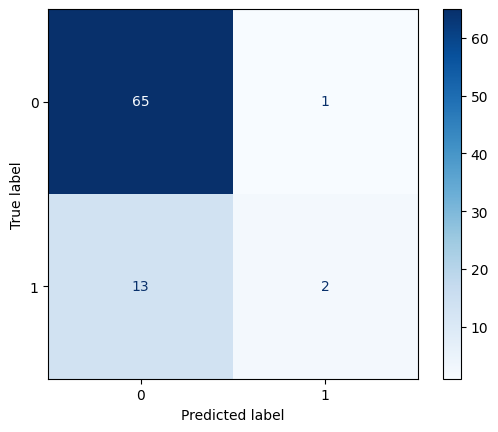

In [42]:
# 最終モデルのテストデータへの適用および性能評価
y_pred = final_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.show()

In [43]:
# Compare base models
Model_accuracy = {}
for name, model in random_search.best_estimator_.estimators:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    Model_accuracy[f"{name}"] = scores.mean()
    print(f"{name} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Evaluate stacking model
stacking_scores = cross_val_score(final_model, X, y, cv=5, scoring='accuracy')
print(f"Stacking Model Accuracy: {stacking_scores.mean():.4f} (+/- {stacking_scores.std():.4f})")

c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


log Accuracy: 0.7600 (+/- 0.0248)
rf Accuracy: 0.8119 (+/- 0.0048)
gb Accuracy: 0.7474 (+/- 0.0543)
svm Accuracy: 0.8119 (+/- 0.0048)
knn Accuracy: 0.8020 (+/- 0.0010)


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_netw

mlp Accuracy: 0.7648 (+/- 0.0161)
nb Accuracy: 0.3636 (+/- 0.1970)


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\s

Stacking Model Accuracy: 0.8094 (+/- 0.0097)


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(
Using 323 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Model: log
  Number_of_Visits: 0.0074
  Number_of_Visits_per_characters: -0.0068
  Number_of_saccades_in_AOI: 0.0124
  Time_to_entry_saccade: -0.0025
  First-pass_first_fixation_duration_per_characters: 0.0000
  First-pass_duration: 0.0031
  Percentage_of_katakana_verb_numerator: 0.0000
  Percentage_of_katakana_noun: -0.0043
  Percentage_of_extra_difficulty_kanzis: 0.0006
  Number_of_characters_of_adnominal_modification: 0.0000
  Cossim_model6: 0.0056
Model: rf
  Number_of_Visits: 0.0000
  Number_of_Visits_per_characters: 0.0000
  Number_of_saccades_in_AOI: 0.0000
  Time_to_entry_saccade: 0.0000
  First-pass_first_fixation_duration_per_characters: 0.0000
  First-pass_duration: 0.0000
  Percentage_of_katakana_verb_numerator: 0.0000
  Percentage_of_katakana_noun: 0.0000
  Percentage_of_extra_difficulty_kanzis: 0.0000
  Number_of_characters_of_adnominal_modification: 0.0000
  Cossim_model6: 0.0000
Model: gb
  Number_of_Visits: 0.0000
  Number_of_Visits_per_characters: 0.0217
  Number_of_s

100%|██████████| 323/323 [07:36<00:00,  1.41s/it]


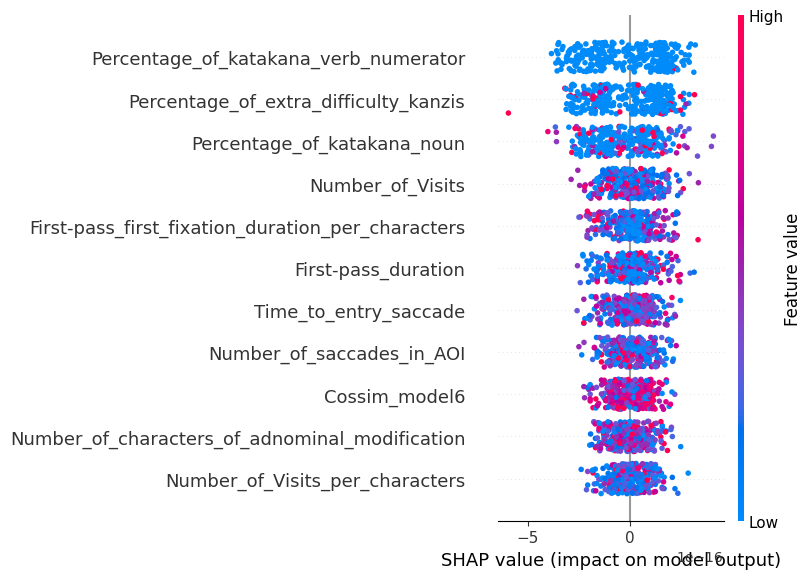

Using 323 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 323/323 [10:14<00:00,  1.90s/it]


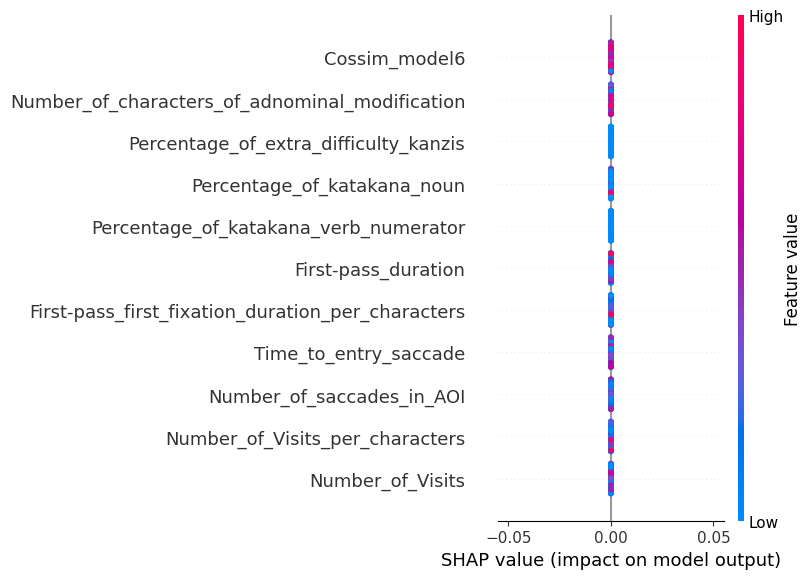

Using 323 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 323/323 [16:08<00:00,  3.00s/it]


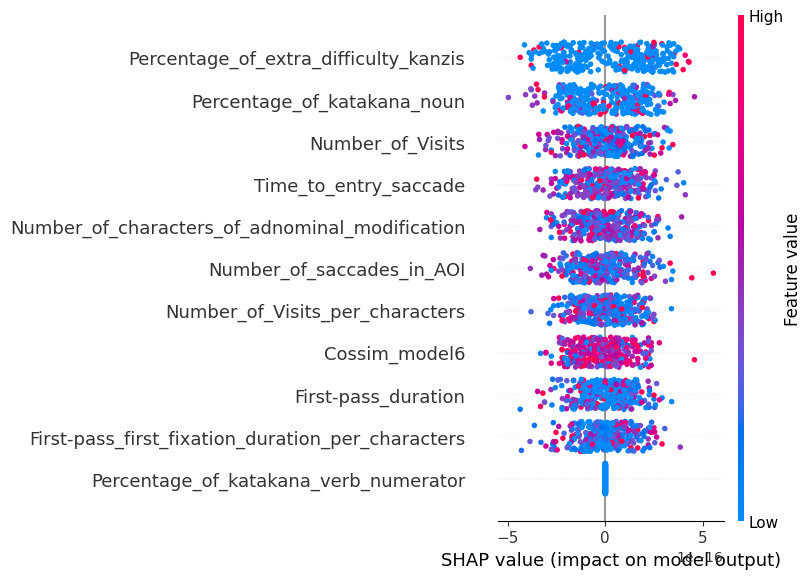

Using 323 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 323/323 [1:28:22<00:00, 16.42s/it]


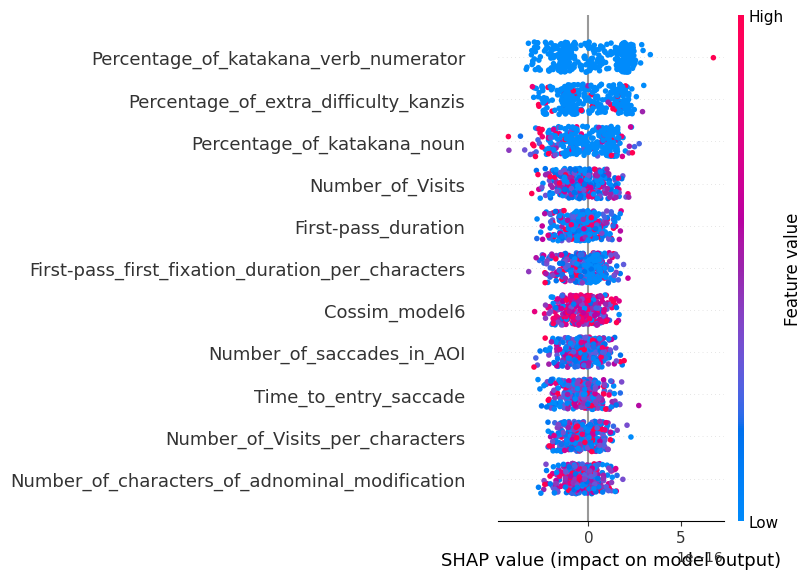

Using 323 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 323/323 [37:45<00:00,  7.01s/it]


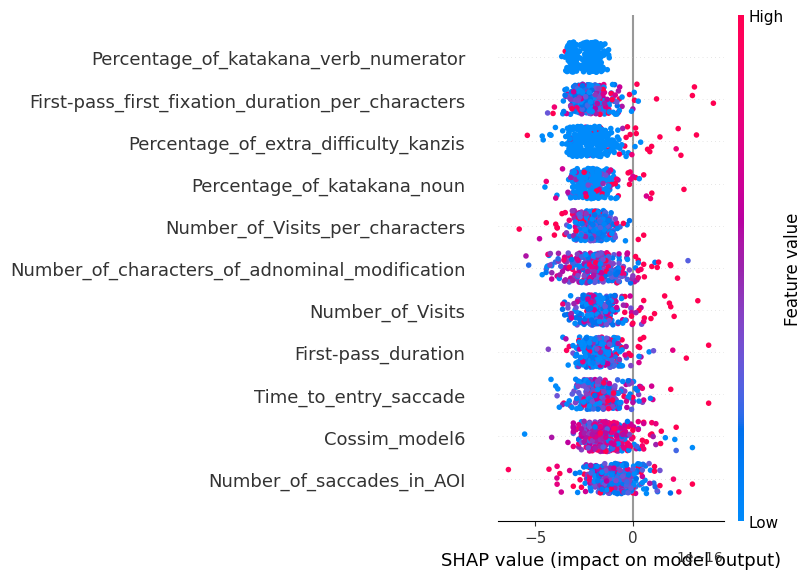

Using 323 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 323/323 [09:00<00:00,  1.67s/it]


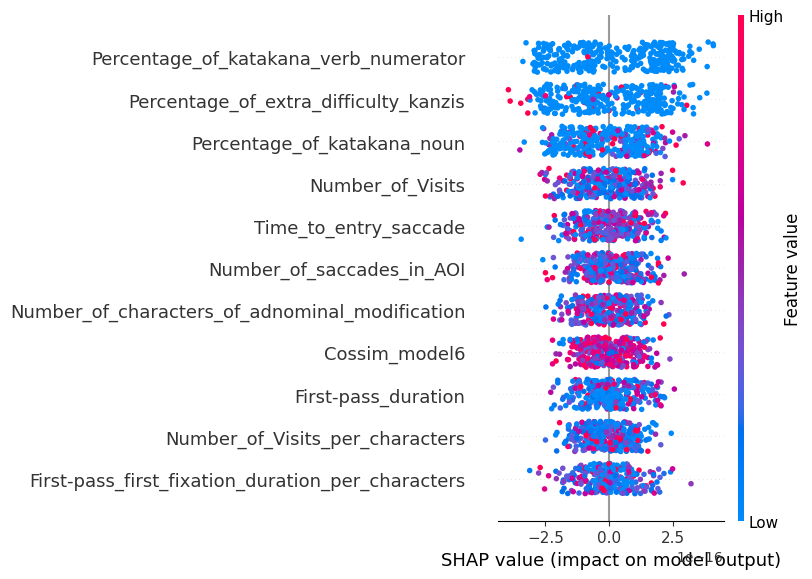

Using 323 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 323/323 [07:14<00:00,  1.34s/it]


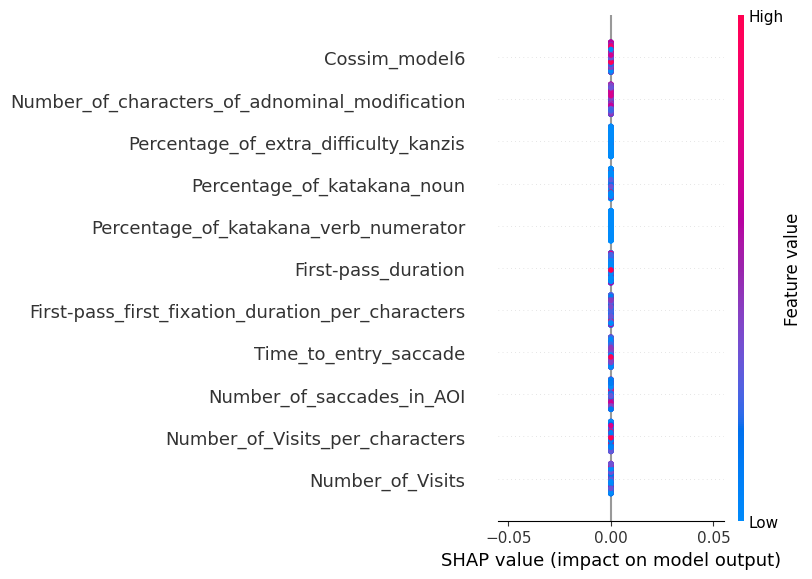

Model log
  Number_of_Visits: 3.4147333438684322e-18
  Number_of_Visits_per_characters: -1.307451735537062e-18
  Number_of_saccades_in_AOI: 1.2994901503114766e-18
  Time_to_entry_saccade: 6.980936108892928e-18
  First-pass_first_fixation_duration_per_characters: 1.2953166118113057e-17
  First-pass_duration: 6.0629307167950044e-18
  Percentage_of_katakana_verb_numerator: -1.535706922395799e-17
  Percentage_of_katakana_noun: -2.1180543988803508e-17
  Percentage_of_extra_difficulty_kanzis: -9.888729412205252e-18
  Number_of_characters_of_adnominal_modification: -5.394633296818075e-18
  Cossim_model6: -3.289529811256329e-18
Model rf
  Number_of_Visits: 0.0
  Number_of_Visits_per_characters: 0.0
  Number_of_saccades_in_AOI: 0.0
  Time_to_entry_saccade: 0.0
  First-pass_first_fixation_duration_per_characters: 0.0
  First-pass_duration: 0.0
  Percentage_of_katakana_verb_numerator: 0.0
  Percentage_of_katakana_noun: 0.0
  Percentage_of_extra_difficulty_kanzis: 0.0
  Number_of_characters_of_adn

In [44]:
# 各モデルの特徴量重要度をPFIとSHAPで算出
from sklearn.inspection import permutation_importance
import shap

# 訓練データ(X_train, y_train)を用いてモデルをフィットします
for name, model in random_search.best_estimator_.estimators:
    model.fit(X_train, y_train)

PFIs = {}
for name, model in random_search.best_estimator_.estimators:
    pfi = permutation_importance(model, X_train, y_train, random_state=42)
    # 特徴量の名前と重要度をセットにした辞書を作成
    feature_importances = {X_train.columns[i]: pfi.importances_mean[i] for i in range(len(X_train.columns))}
    PFIs[f'{name}'] = feature_importances

# 結果の確認
for model_name, importances in PFIs.items():
    print(f"Model: {model_name}")
    for feature, importance in importances.items():
        print(f"  {feature}: {importance:.4f}")


SHAPs = {}
for name, model in random_search.best_estimator_.estimators:
    explainer = shap.KernelExplainer(model.predict_proba, X_train_scaled)
    shap_values = explainer.shap_values(X_train_scaled)
    shap_importances = np.mean(shap_values, axis=(0, 2))
    shaps = {X_train.columns[i]: shap_importances[i] for i in range(len(X_train.columns))}
    # SHAPs[f'{name}'] = np.mean(shap_values, axis=(0, 2))
    shap.summary_plot(np.mean(shap_values, axis=2), X_train_scaled, feature_names=selected_features)
    SHAPs[f'{name}'] = shaps

# 結果を表示
for model_name, importances in SHAPs.items():
    print(f"Model {model_name}")
    for feature, importance in importances.items():
        print(f"  {feature}: {importance}")




In [45]:
""" # グラフプロット用の関数
def plot_feature_importance(Model):
    for model_name, features in Model.items():
        plt.figure(figsize=(10, 6))
        names, values = zip(*sorted(features.items(), key=lambda x: x[1], reverse=True))
        plt.barh(names, values, color='skyblue')
        plt.title(f"Feature Importance for Model: {model_name}")
        plt.xlabel("Permutation Importance")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.show()

# グラフ描画
plot_feature_importance(PFIs) """


' # グラフプロット用の関数\ndef plot_feature_importance(Model):\n    for model_name, features in Model.items():\n        plt.figure(figsize=(10, 6))\n        names, values = zip(*sorted(features.items(), key=lambda x: x[1], reverse=True))\n        plt.barh(names, values, color=\'skyblue\')\n        plt.title(f"Feature Importance for Model: {model_name}")\n        plt.xlabel("Permutation Importance")\n        plt.ylabel("Features")\n        plt.tight_layout()\n        plt.show()\n\n# グラフ描画\nplot_feature_importance(PFIs) '

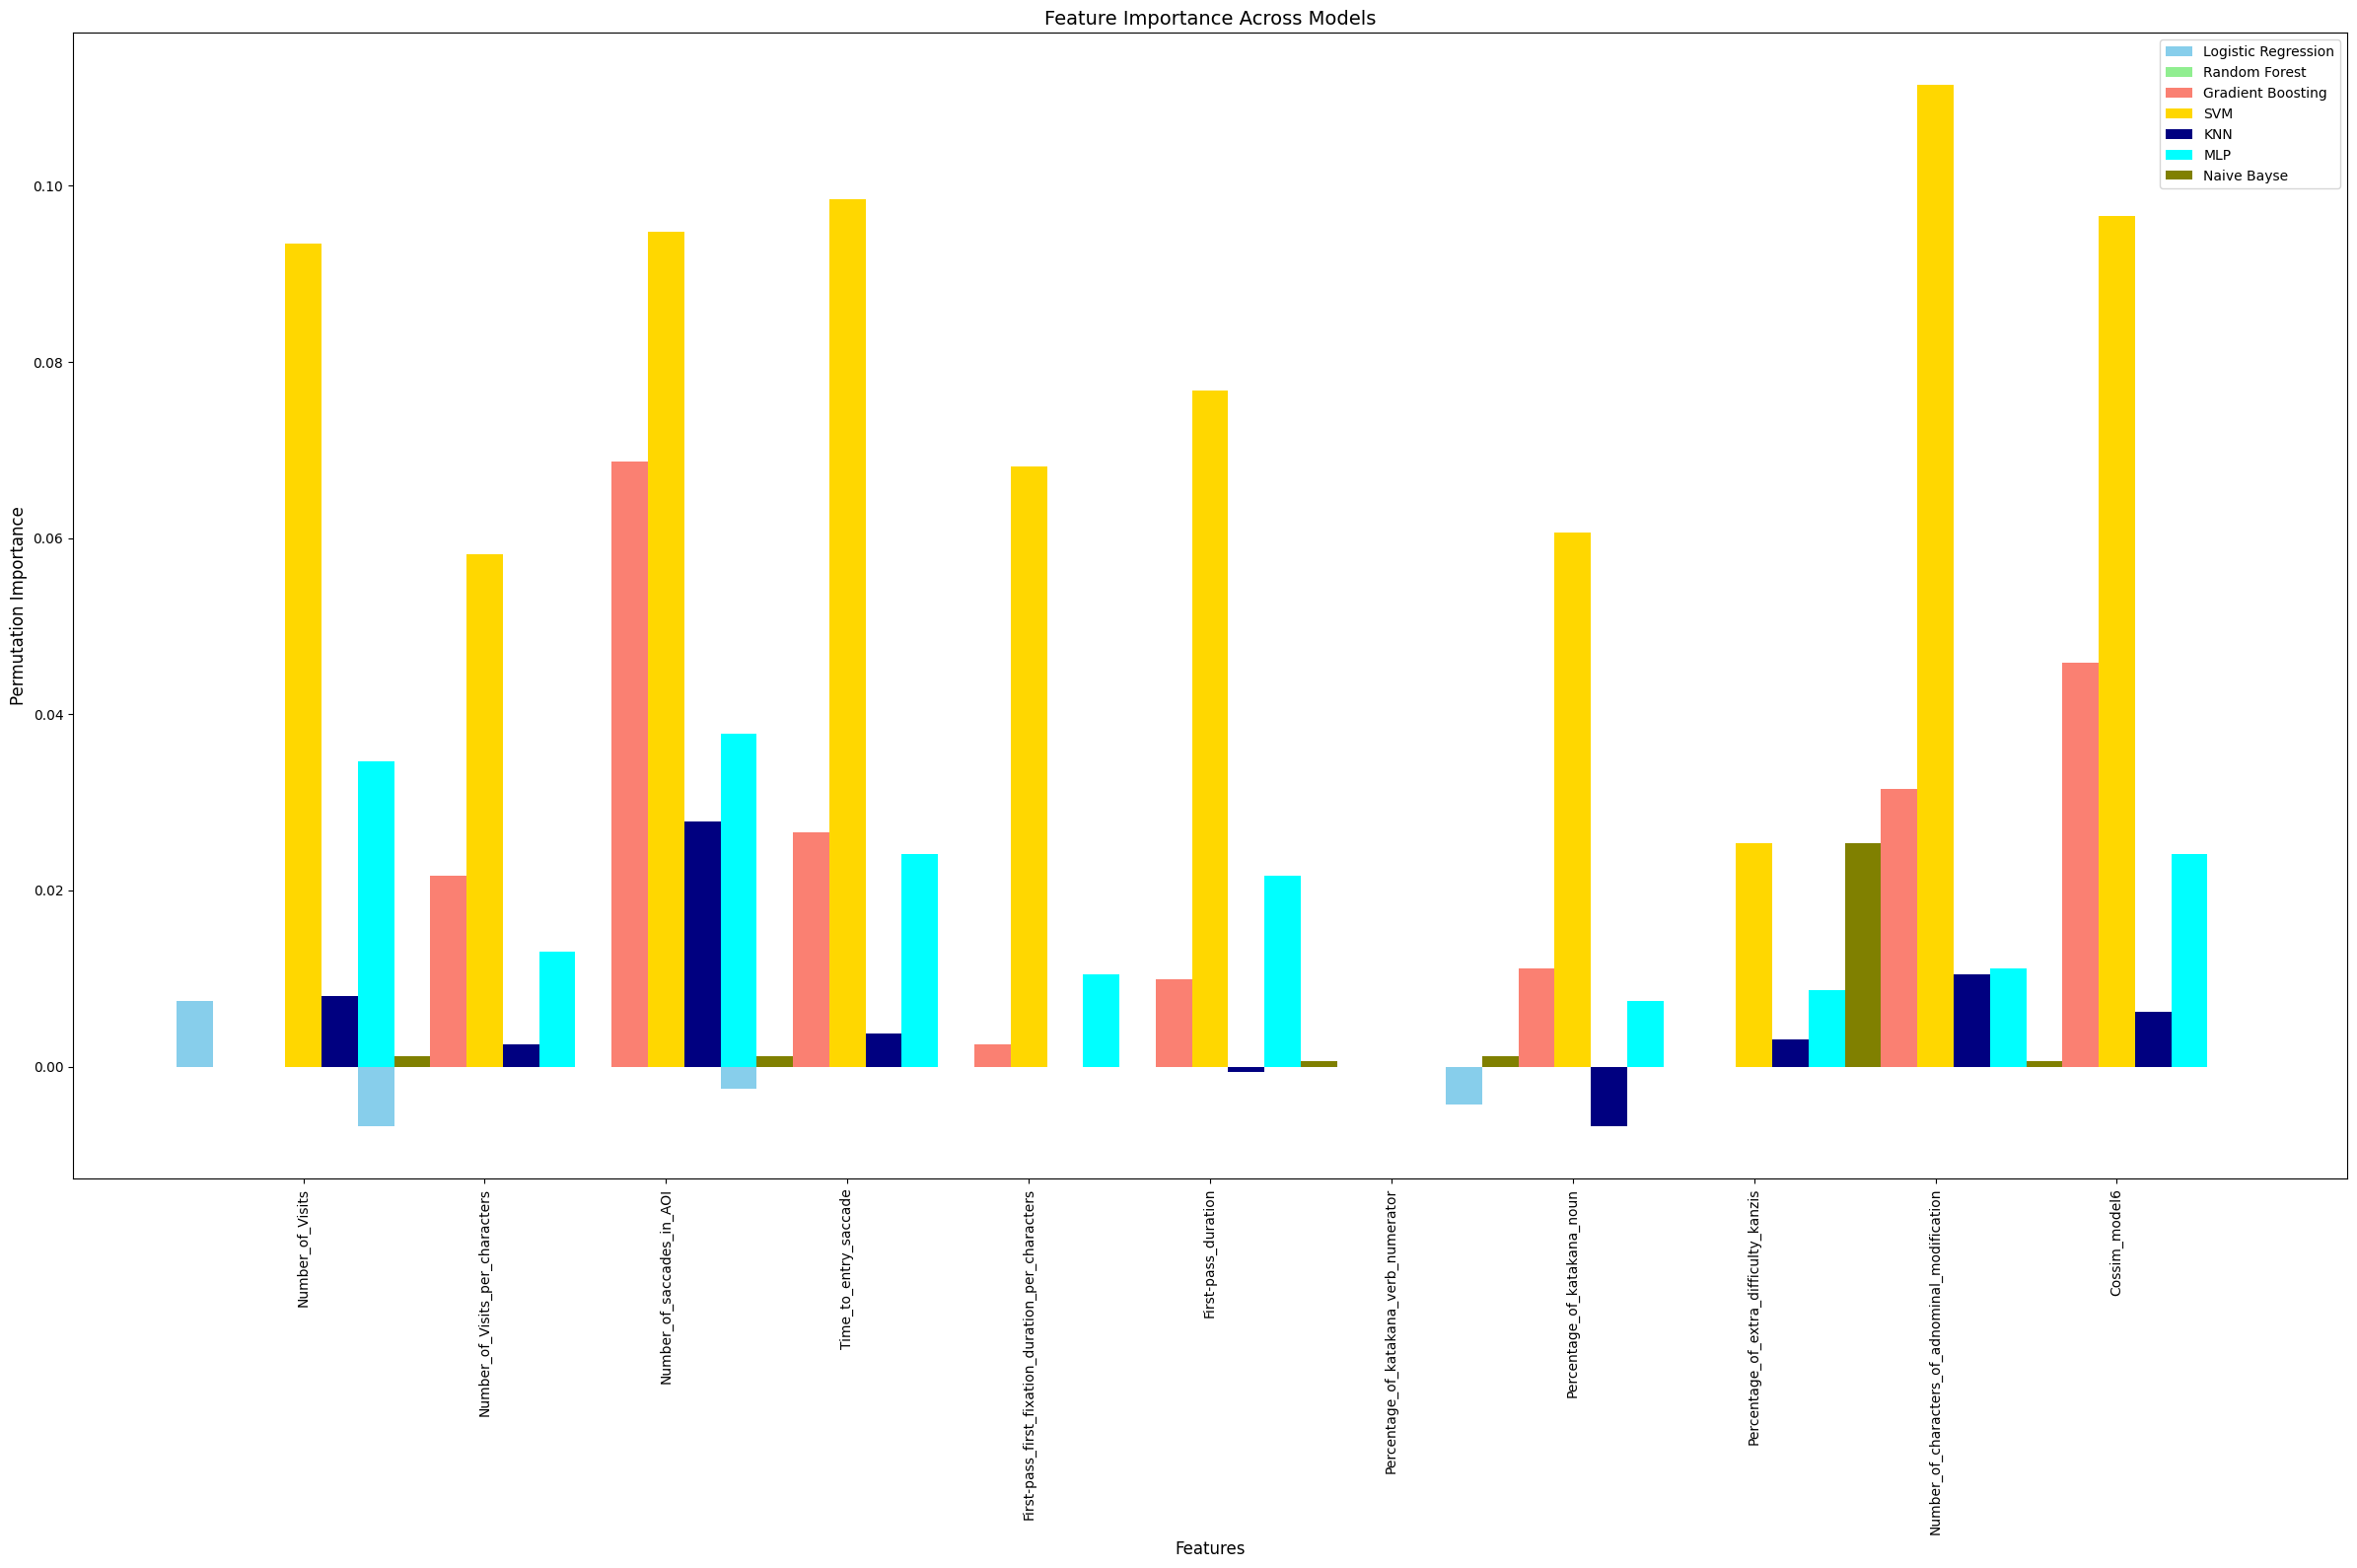

In [46]:
# 各モデルのデータを取得し、共通する特徴量リストを取得
features = list(PFIs["log"].keys())
importance_log = [PFIs["log"].get(f, 0) for f in features]
importance_rf = [PFIs["rf"].get(f, 0) for f in features]
importance_gb = [PFIs["gb"].get(f, 0) for f in features]
importance_svm = [PFIs["svm"].get(f, 0) for f in features]
importance_knn = [PFIs["knn"].get(f, 0) for f in features]
importance_mlp = [PFIs["mlp"].get(f, 0) for f in features]
importance_nb = [PFIs["nb"].get(f, 0) for f in features]

# グラフ描画
x = np.arange(len(features))  # 各特徴量の位置
width = 0.2  # バーの幅

fig, ax = plt.subplots(figsize=(12*2, 8*2))

# 各モデルの棒グラフをプロット
ax.bar(x - 3*width, importance_log, width, label='Logistic Regression', color='skyblue')
ax.bar(x - 2*width, importance_rf, width, label='Random Forest', color='lightgreen')
ax.bar(x - width, importance_gb, width, label='Gradient Boosting', color='salmon')
ax.bar(x, importance_svm, width, label='SVM', color='gold')
ax.bar(x + width, importance_knn, width, label='KNN', color='navy')
ax.bar(x + 2*width, importance_mlp, width, label='MLP', color='aqua')
ax.bar(x + 3*width, importance_nb, width, label='Naive Bayse', color='olive')

# 軸ラベルや目盛設定
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Permutation Importance', fontsize=12)
ax.set_title('Feature Importance Across Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=90, fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()

In [47]:
# # 結果の記録
# basemodel_names = [name for name, _ in base_models]

# import datetime
# currenttime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# """ Accuracy = accuracy_score(y_test, y_pred)
# Precision = precision_score(y_test, y_pred, average='weighted')
# Recall = recall_score(y_test, y_pred, average='weighted')
# F1_Score = f1_score(y_test, y_pred, average='weighted') """

# model_list = random_search.best_estimator_.estimators
# Models = {}
# for name, _ in model_list:
#     Models[f"{name}"] = f"{name}"



# result = {'Original Data shape': [X.shape],
#             'sfs_model' : [sfs_model],
#             'Models': [basemodel_names],
#             'Best number of features': len(sfs.k_feature_idx_),
#             'Slected Features': [selected_features],
#             'Model Params':[random_search.best_params_],
#             'Accuracy': accuracy_score(y_test, y_pred),
#             'Precision': precision_score(y_test, y_pred, average='weighted'),
#             'Recall': recall_score(y_test, y_pred, average='weighted'),
#             'F1_Score' : f1_score(y_test, y_pred, average='weighted'),
#             'Date': currenttime,
#             'Dataset' : file_path
#             }

# save_importances = {
#                     'model' : Models,
#                     'PFI' : PFIs,
#                     # 'SHAP' : SHAPs,
#                     'Date': currenttime
#                     }

# new_result = pd.DataFrame(result)
# new_result.to_csv('C:/WorkSpace/Practice/卒研B/result2.csv',
#                   mode='a',
#                   header=False,
#                   index=False)

# new_importances = pd.DataFrame(save_importances)
# new_importances.to_csv('C:/WorkSpace/Practice/卒研B/importances.csv',
#                   mode='a',
#                   header=True,
#                   index=False)

In [48]:
# 結果の記録
basemodel_names = [name for name, _ in base_models]

import datetime
currenttime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

""" Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
F1_Score = f1_score(y_test, y_pred, average='weighted') """

model_list = random_search.best_estimator_.estimators
Models = {}
for name, _ in model_list:
    Models[f"{name}"] = f"{name}"



result = {'Original Data shape': [X.shape],
            'sfs' : sfs,
            'Models': [basemodel_names],
            'Best number of features': len(selected_features),
            'Slected Features': [selected_features],
            'Model Params':[random_search.best_params_],
            'Model Accuravy':[Model_accuracy],
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1_Score' : f1_score(y_test, y_pred, average='weighted'),
            'Date': currenttime,
            'Dataset' : file_path
            }

save_importances = {
                    'model' : Models,
                    'PFI' : PFIs,
                    'SHAP' : SHAPs,
                    'Date': currenttime
                    }

new_result = pd.DataFrame(result)
new_result.to_csv('C:/WorkSpace/Practice/卒研B/result4.csv',
                  mode='a',
                  header=False,
                  index=False)

new_importances = pd.DataFrame(save_importances)
new_importances.to_csv('C:/WorkSpace/Practice/卒研B/importances4.csv',
                  mode='a',
                  header=True,
                  index=False)

In [49]:
random_search.best_estimator_.estimators

[('log', LogisticRegression(C=1, max_iter=127, random_state=42, solver='sag')),
 ('rf',
  RandomForestClassifier(criterion='entropy', max_depth=44,
                         min_samples_leaf=0.46194860129903925, n_estimators=63,
                         random_state=42)),
 ('gb',
  GradientBoostingClassifier(learning_rate=0.23515057742959405, max_depth=6,
                             min_samples_leaf=2, n_estimators=114,
                             random_state=42, subsample=0.6642657979309929)),
 ('svm', SVC(C=89.97674452921731, gamma=1, probability=True, random_state=42)),
 ('knn', KNeighborsClassifier(leaf_size=14, n_neighbors=4)),
 ('mlp',
  MLPClassifier(alpha=0.00917866130462516, max_iter=141, random_state=42)),
 ('nb', GaussianNB())]

In [50]:
import time
for i in range(5):
    print(i)
    time.sleep(1)
!rundll32 user32.dll,MessageBeep

0
1
2
3
4
